<a href="https://colab.research.google.com/github/27priyanshu/ML-project/blob/main/Copy_of_SUSY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Dataset Description:**

###Task:

Collisions at high-energy particle colliders are a traditionally fruitful source of exotic particle discoveries. Finding these rare particles requires solving difficult signal-versus-background classification problems, hence machine learning approaches are often used. The vast majority of particle collisions do not produce exotic particles. Therefore, good data analysis depends on distinguishing collisions which produce particles of interest (signal) from those producing other particles (background).

###Data:

The data has been produced using Monte Carlo simulations. The first 8 features are kinematic properties measured by the particle detectors in the accelerator. The last ten features are functions of the first 8 features; these are high-level features derived by physicists to help discriminate between the two classes.

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Importing dataset Using Google Drive.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
df=pd.read_csv('/content/gdrive/My Drive/SUSY.csv',header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859


In [3]:
print(df.values.shape)

(5000000, 19)


Shape of our Dataset (5000000, 19)

Now I will make histograms of the number of labels and the features.
I do this to get an idea about the rough distribution of data. We make observations from the histograms and decide our further approach based on them.

                  0
count  5.000000e+06
mean   4.575654e-01
std    4.981961e-01
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    1.000000e+00
max    1.000000e+00


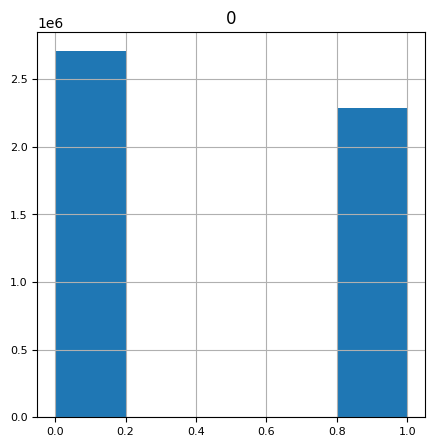

In [4]:
print(df[df.columns[0:1]].describe())
df[df.columns[0:1]].hist(figsize=(5, 5), bins=5, xlabelsize=8, ylabelsize=8);

From this, wecan observe that the number of both 0 and 1 labels are almost equally distributed. 
And the mean is 0.46(approx) this further reassures this fact.
Also the std. deviation is 0.5(approx) and then Variance will be 0.25(approx).
as we know:-
Var(X) = (S.D)^2

                 1             2             3             4             5   \
count  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06   
mean   1.000318e+00  2.192580e-05 -4.994657e-05  9.994304e-01 -3.713140e-05   
std    6.873341e-01  1.003107e+00  1.001670e+00  6.542200e-01  1.002839e+00   
min    2.548815e-01 -2.102927e+00 -1.734789e+00  4.285860e-01 -2.059306e+00   
25%    5.624837e-01 -7.573512e-01 -8.673567e-01  5.969881e-01 -7.695916e-01   
50%    7.915511e-01  1.342127e-04 -3.880155e-04  7.997993e-01 -3.793710e-04   
75%    1.204413e+00  7.576486e-01  8.670981e-01  1.162353e+00  7.692296e-01   
max    2.055345e+01  2.101605e+00  1.734839e+00  3.303562e+01  2.059721e+00   

                 6             7             8             9             10  \
count  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06   
mean  -1.972243e-05  9.999744e-01  3.542352e-05  1.001437e+00 -4.878472e-05   
std    1.001631e+00  8.728877e-01  1.001654e+00  8.

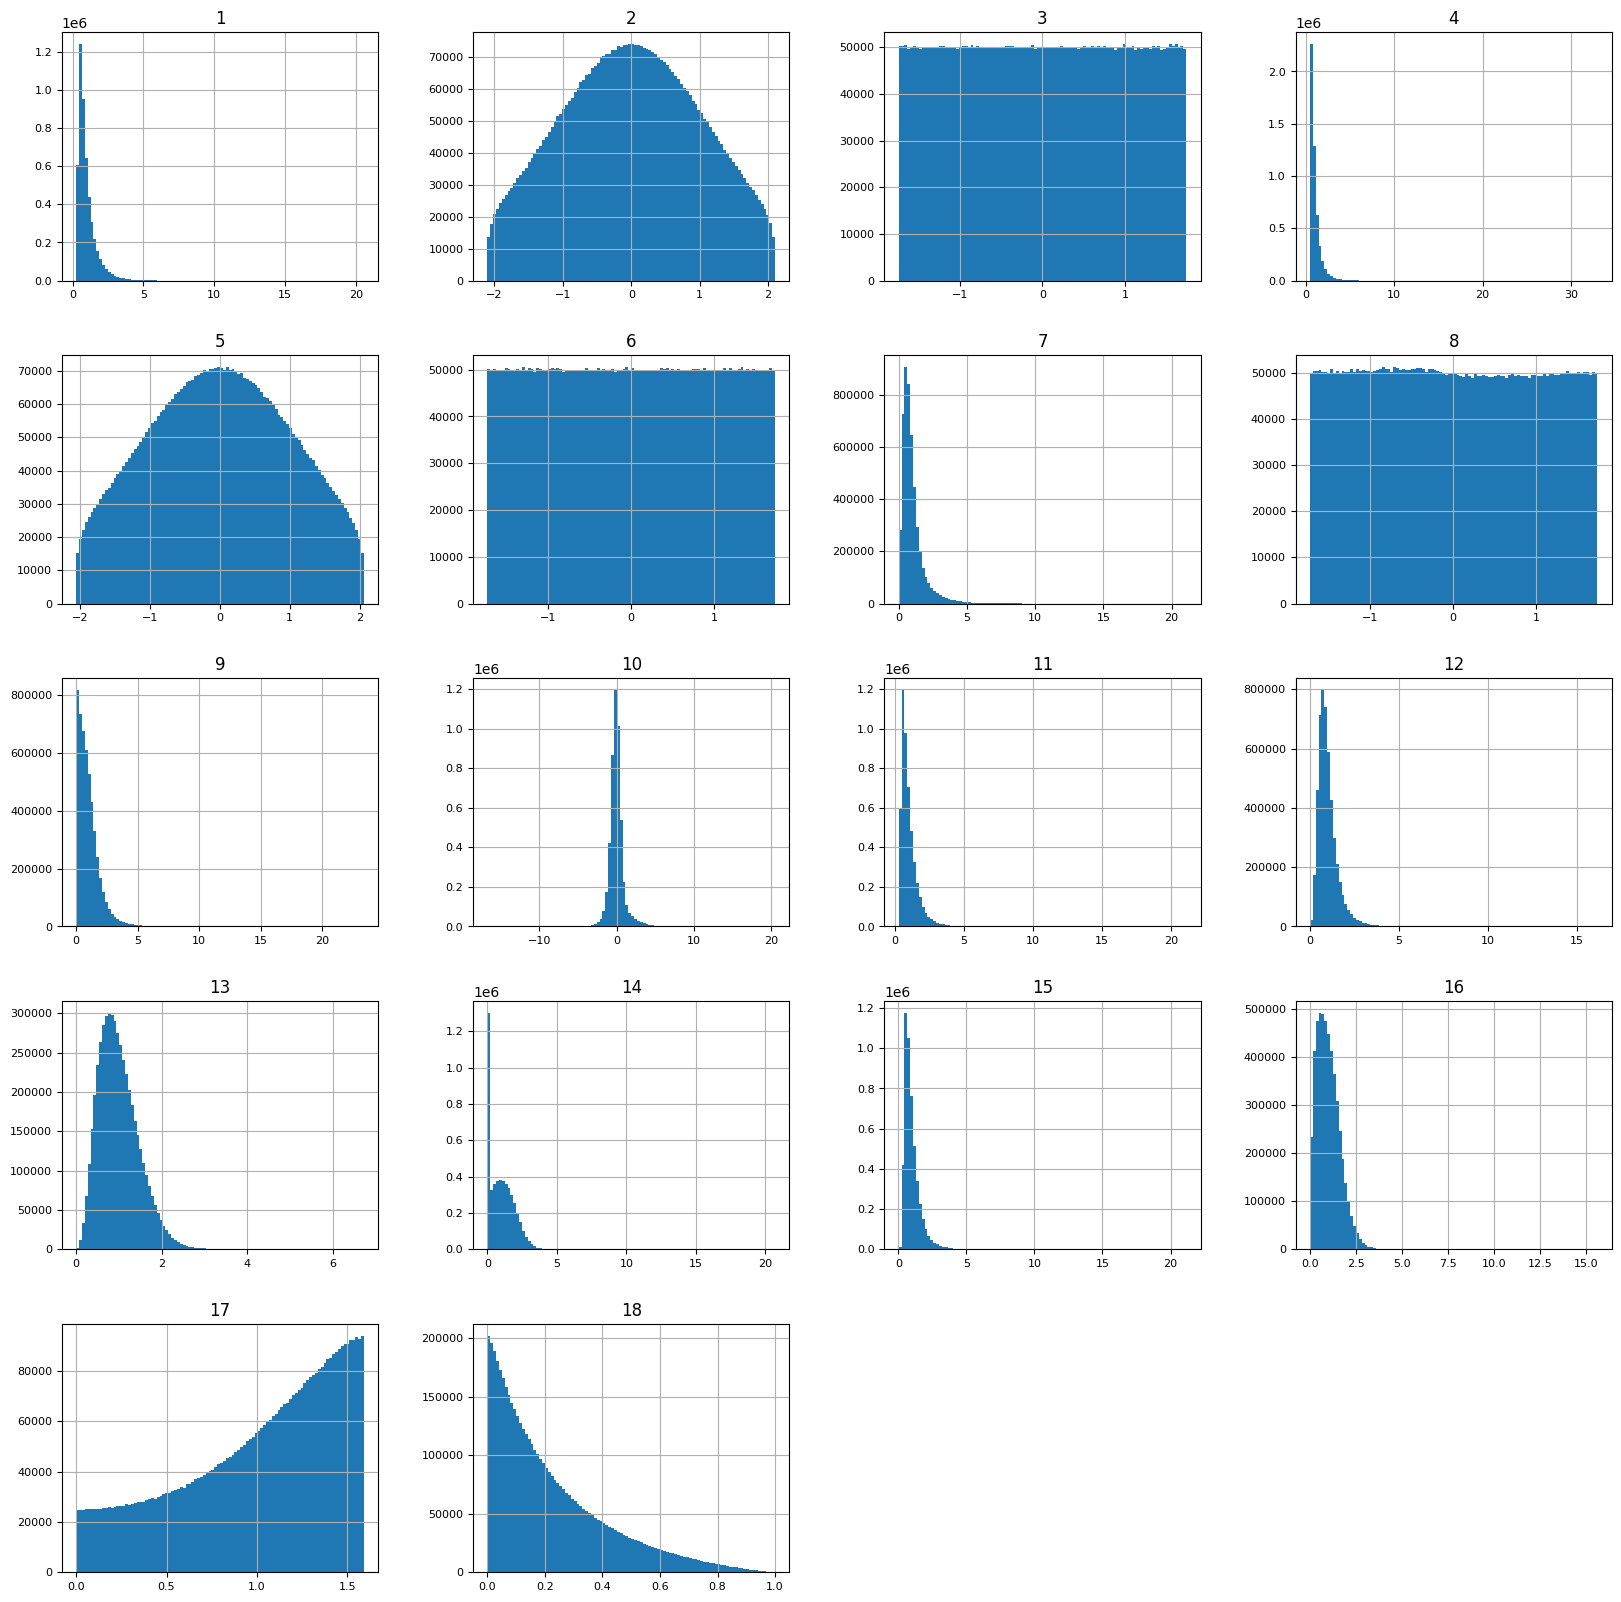

In [5]:
print(df[df.columns[1:19]].describe())
df[df.columns[1:19]].hist(figsize=(20, 20), bins=100, xlabelsize=8, ylabelsize=8);

Here, we can see that features in columns 3,6,8 are almost evenly distributed along their range i.e. [-1.5,1.5]. Hence, we try to plot these separately to analyse them better for any outliers.
We also observe that the feature in column 14 has an abnormally high mode at the value 0 we analyse this further by making box plot and finding their mean, mode, quartiles. We see that features in column 2 and 5 are distributed similarly in [-2,2] so We further check their correlation which should be high.

**Box plot to identify outliers**

                  3             6             8
count  5.000000e+06  5.000000e+06  5.000000e+06
mean  -4.994657e-05 -1.972243e-05  3.542352e-05
std    1.001670e+00  1.001631e+00  1.001654e+00
min   -1.734789e+00 -1.734202e+00 -1.727117e+00
25%   -8.673567e-01 -8.683741e-01 -8.661510e-01
50%   -3.880155e-04  2.006134e-04 -9.172642e-03
75%    8.670981e-01  8.674778e-01  8.687620e-01
max    1.734839e+00  1.734686e+00  1.740689e+00


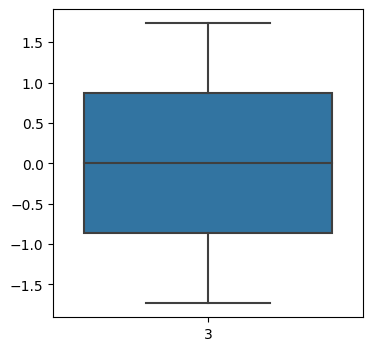

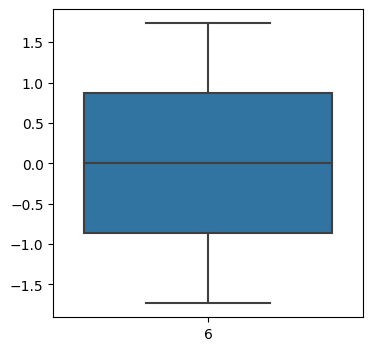

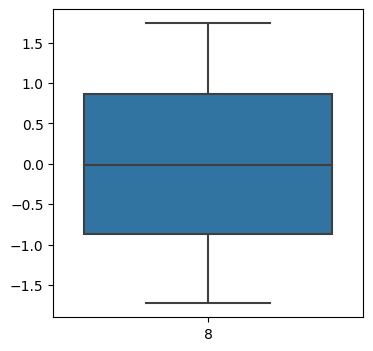

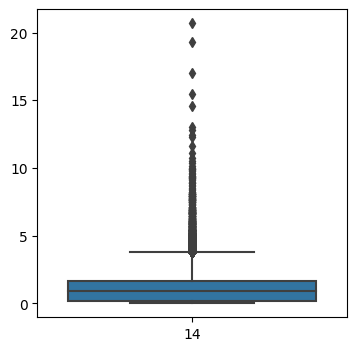

In [6]:
print(df[[3,6,8]].describe())
for i in [3,6,8,14]:
  plt.figure(figsize=(4,4))
  sns.boxplot(df[[i]], orient='v')

Here we observe that, there are no outliers in the features in column 3,6,8 and every point lies in the interval [-1.5, 1.5]. We also see that the number of point with the value of feature 14 as 0 are as much as half. As the mean is 1 and the values lie between 0 and 2. But we see that the variation is quite significant as the std. deviation is ~0.86.


We now see the correlation of different features with the label so find out the important features and filter out the non-important features. Correlation helps us identify linear relationship between two variables. If the abs value of corr is high, that means the variables have strong linear dependence. We try to filter out the features by observing their correlation with the labels. For non-linear relationship, we further make scatter plots in the next section.

In [7]:
df_corr = df.corr()[[0]][1:19]
print(df_corr.sort_values(by=0,ascending=False))


           0
7   0.438821
12  0.423030
1   0.387397
9   0.282778
16  0.272992
18  0.268780
11  0.266589
15  0.258326
4   0.194794
13  0.111937
14  0.079421
10  0.077078
17  0.032656
5   0.000380
8   0.000110
6  -0.000099
2  -0.000328
3  -0.000462


We see that the features in columns 7, 12, 1, 9, 16, 11, 15, 4, 13 have absolute value of correlation coeff >0.1 where as others < 0.1


#**Supervised Machine Learning Techniques**

Now,we aim to use the 18 features in the dataset to predict the target label, i.e. given a vector of features of physical measurements, predict whether the observation corresponds to a signal event or a background event.

To begin with, we first prepare the dataset as follows:

In [8]:
X = df.values[:,1:]
y = df.values[:,0]

we used the first 1,000,000 examples for training and validation, with a 20% split of examples for testing

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X[:100000], y[:100000], test_size=.2, random_state=0) 

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

clf1=RandomForestClassifier()
clf2=LogisticRegression()
clf3=GaussianNB()
clf4=KNeighborsClassifier()
clf5=SVC() 

In [11]:
clf=[clf1, clf2, clf3, clf4, clf5]
clf_name=['RFC', 'LR', 'GNB', 'KNN', 'SVC']

acc={}
t={}
import time
from sklearn.metrics import accuracy_score
for model, model_name in zip(clf, clf_name):
  st=time.time()
  model.fit(x_train, y_train)
  pred=model.predict(x_test)
  et=time.time()
  acc[model_name]=accuracy_score(pred, y_test)
  t[model_name]=et-st

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<BarContainer object of 5 artists>

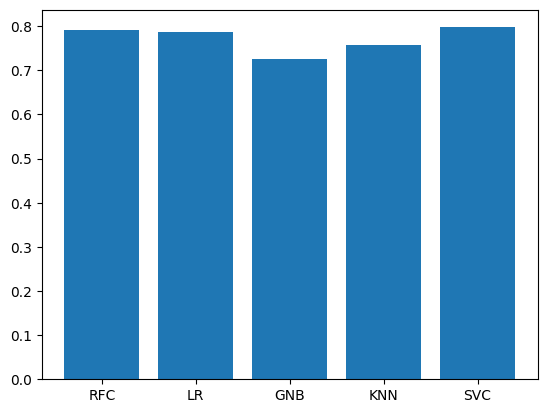

In [12]:
import matplotlib.pyplot as plt
plt.bar(acc.keys(), acc.values())

<BarContainer object of 5 artists>

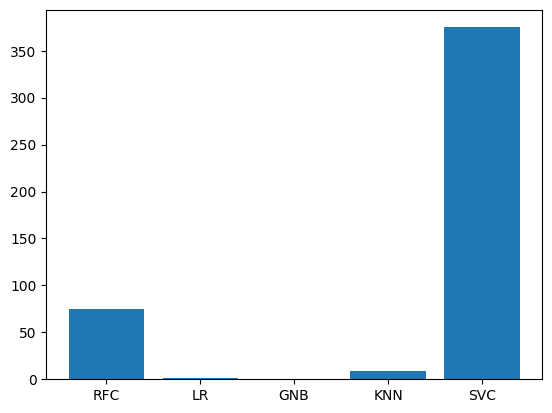

In [13]:
plt.bar(t.keys(), t.values())

In [14]:
for i,j in acc.items():
  print(i, ':-', j)

RFC :- 0.79155
LR :- 0.78585
GNB :- 0.72565
KNN :- 0.75655
SVC :- 0.7973
